In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_excel("BlinkIT Grocery Data.xlsx")

In [38]:
#sample data
print(df.tail(10))

     Item Fat Content Item Identifier              Item Type  \
8513          Regular           DRY23            Soft Drinks   
8514          low fat           FDA11           Baking Goods   
8515          low fat           FDK38                 Canned   
8516          low fat           FDO38                 Canned   
8517          low fat           FDG32  Fruits and Vegetables   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
8513                       2018            OUT027               Tier 3   
8514                       2018            OUT027               Tier 3   
8515                       2018            OUT027               Tier 3   

In [39]:
print("size of the data:",df.shape ,"\n")
print("data types:",df.dtypes ,"\n")
print("columns:",df.columns ,"\n")

size of the data: (8523, 12) 

data types: Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object 

columns: Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object') 



Data Cleaning

In [40]:
print(df['Item Fat Content'].unique())

df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
['Regular' 'Low Fat']


**BUSINESS REQUIREMENTS**

KPI's Requirements

In [41]:
#total sales
total_sales=df['Sales'].sum()

#avg sales
avg_sales=df['Sales'].mean()

#no :of items
no_of_items=df['Sales'].count()

#avg rating

avg_rating=df['Rating'].mean()

#display
print(f"Total Sales: ${total_sales:,.1f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"Number of Items: {no_of_items:,.1f}")
print(f"Average Rating: {avg_rating:,.1f}")

Total Sales: $1,201,681.5
Average Sales: $141.0
Number of Items: 8,523.0
Average Rating: 4.0


**CHARTS REQUIREMENTS**

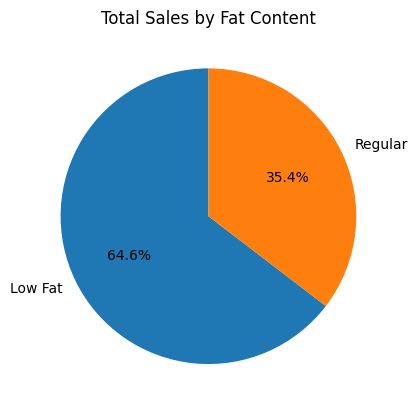

In [42]:
#totals sales by fat content
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%1.1f%%',startangle=90)
plt.title('Total Sales by Fat Content')
plt.show()

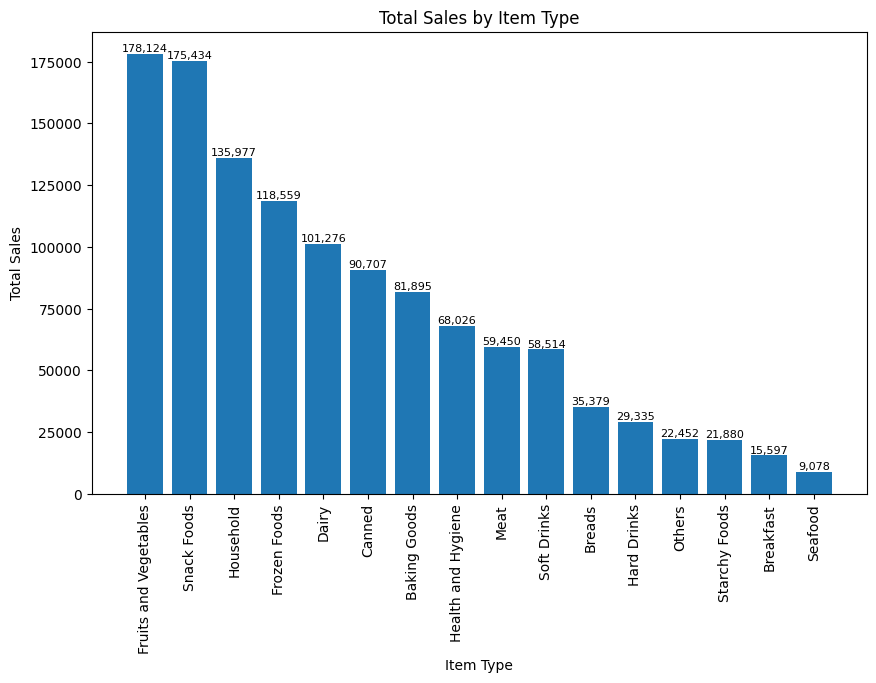

In [43]:
#total sales by item type
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=90)

for bar in bars:
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8 )

plt.show()

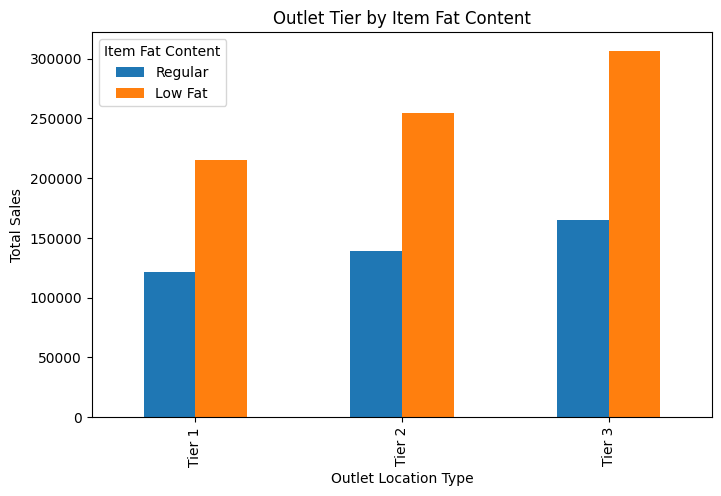

In [44]:
fat_outlet_sales = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Select only the columns you want
grouped = fat_outlet_sales[['Regular', 'Low Fat']]

# Plot
ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.show()


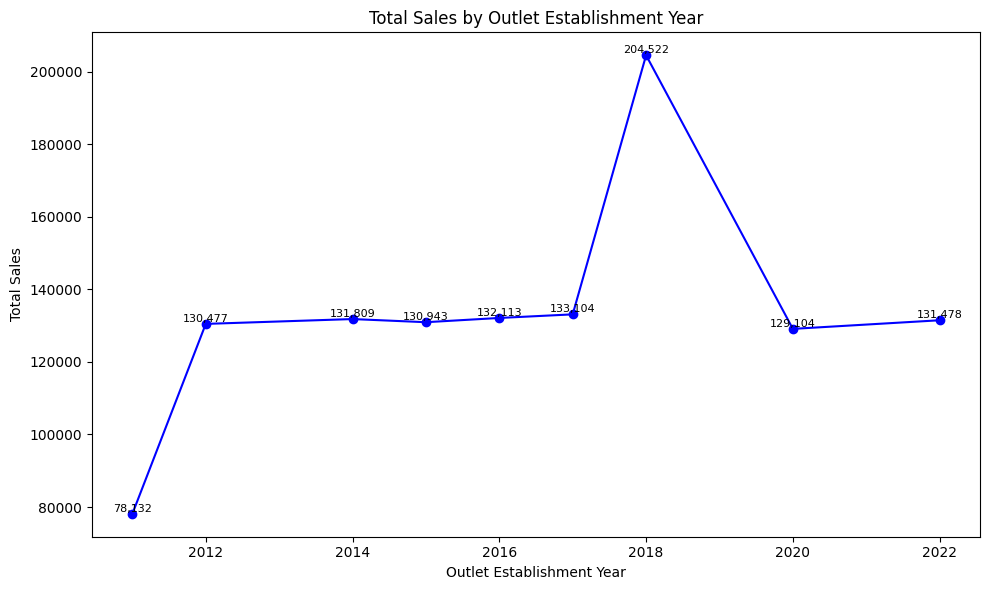

In [45]:
#total sales by outlet establishment

sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-',color='b')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x,y in zip(sales_by_year.index,sales_by_year.values):
  plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Outlet Size')

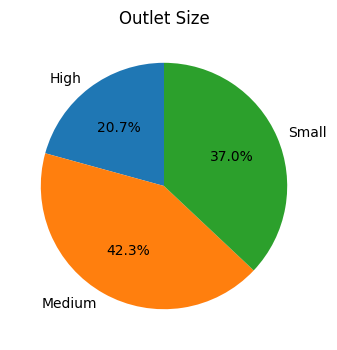

In [46]:
#sales by outlet size
sales_by_size=df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(sales_by_size,labels=sales_by_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')


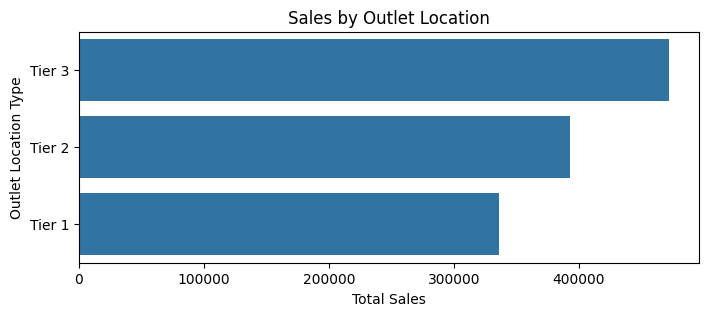

In [47]:
#sales by outlet location
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location.sort_values(by='Sales',ascending=False,inplace=True)
plt.figure(figsize=(8,3))
sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)
plt.title('Sales by Outlet Location')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.show()

Regression:-
To predict future sales values for products/outlets based on historical attributes

In [48]:
#importing data sets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [49]:
#loading dataset

df=pd.read_excel("BlinkIT Grocery Data.xlsx",sheet_name='BlinkIT Grocery Data')
#drop unnecessary columns
data=df.drop(['Item Identifier','Outlet Identifier'],axis=1)

#encode categorical columns
cat_cols=data.select_dtypes(include=['object']).columns
print("Category Columns:",cat_cols)
le=LabelEncoder()
for col in cat_cols:
  data[col]=le.fit_transform(data[col])

#handling missing values
imputer=SimpleImputer(strategy='mean')
data=pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

#predicting sales
x=data.drop('Sales',axis=1)
y=data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)
print("\nRegression Results(Sales Prediction):")
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score:",r2_score(y_test,y_pred))



Category Columns: Index(['Item Fat Content', 'Item Type', 'Outlet Location Type', 'Outlet Size',
       'Outlet Type'],
      dtype='object')

Regression Results(Sales Prediction):
RMSE: 43.9875010632279
R2 Score: 0.5115621493848641


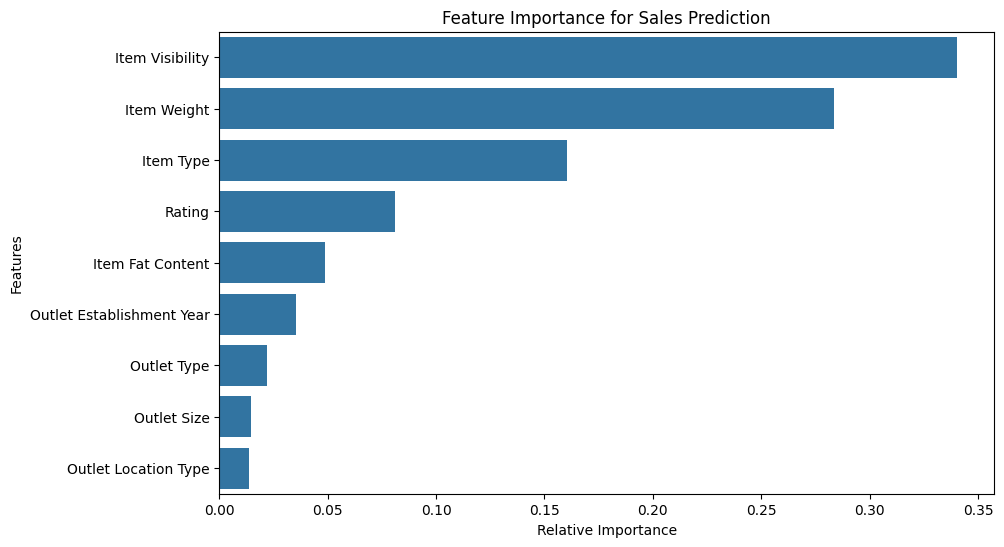

In [50]:
#Feature Importance Plot
importtances=model.feature_importances_
indices=np.argsort(importtances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance for Sales Prediction")
sns.barplot(x=importtances[indices],y=x.columns[indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()

Classification:- High vs Low Sales

In [51]:
median_sales=data['Sales'].median()
data['High_Sales']=(data['Sales']>median_sales).astype(int)

x_cls=data.drop(['Sales','High_Sales'],axis=1)
y_cls=data['High_Sales']

x_train_cls,x_test_cls,y_train_cls,y_test_cls=train_test_split(x_cls,y_cls,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_cls_scaled=scaler.fit_transform(x_train_cls)
x_test_cls_scaled=scaler.transform(x_test_cls)

cls_model=RandomForestClassifier(n_estimators=100,random_state=42)
cls_model.fit(x_train_cls_scaled,y_train_cls)

y_pred_cls=cls_model.predict(x_test_cls_scaled)
print("\nClassification Results(High vs Low Sales):")
print("Accuracy:",accuracy_score(y_test_cls,y_pred_cls))
print("Classification Report:\n",classification_report(y_test_cls,y_pred_cls))


Classification Results(High vs Low Sales):
Accuracy: 0.6803519061583577
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.68       864
           1       0.67      0.70      0.68       841

    accuracy                           0.68      1705
   macro avg       0.68      0.68      0.68      1705
weighted avg       0.68      0.68      0.68      1705



<function matplotlib.pyplot.show(close=None, block=None)>

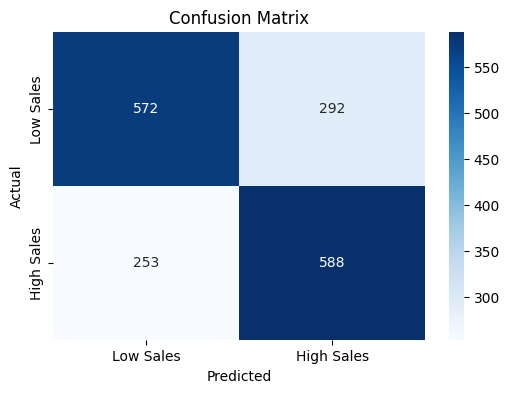

In [52]:
#confusion matrix
cm=confusion_matrix(y_test_cls,y_pred_cls)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Low Sales','High Sales'],yticklabels=['Low Sales','High Sales'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

Clustering:-Group Products/Outlets

In [53]:
x_cluster=data.drop(['Sales','High_Sales'],axis=1)
scaler=StandardScaler()
x_cluster_scaled=scaler.fit_transform(x_cluster)

kmeans=KMeans(n_clusters=3,random_state=42)
data['Cluster']=kmeans.fit_predict(x_cluster_scaled)

print("\nClustering Results:")
print(data['Cluster'].value_counts())


Clustering Results:
Cluster
1    4587
0    2073
2    1863
Name: count, dtype: int64


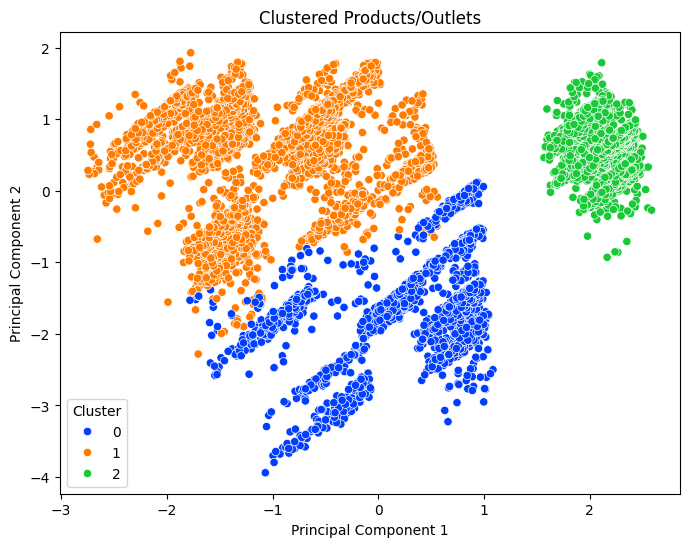

In [54]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_cluster_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=data['Cluster'],palette='bright')
plt.title('Clustered Products/Outlets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

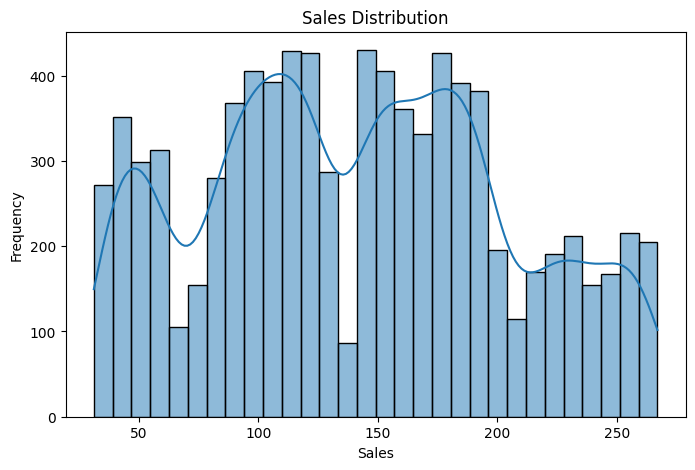

In [55]:
#Sales Distribution
# -------------------
plt.figure(figsize=(8,5))
sns.histplot(data["Sales"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

📌 Sales by Year:
 Outlet Establishment Year
2018.0    204522.2570
2017.0    133103.9070
2016.0    132113.3698
2014.0    131809.0156
2022.0    131477.7764
2015.0    130942.7802
2012.0    130476.8598
2020.0    129103.9604
2011.0     78131.5666
Name: Sales, dtype: float64


/tmp/ipython-input-3019910936.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_sales.index, y=year_sales.values, palette="viridis")


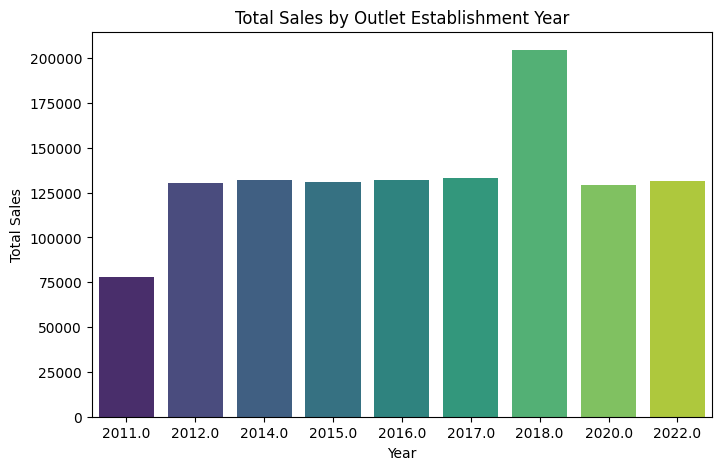

📌 Sales by Item Type:
 Item Type
6.0     178124.0810
13.0    175433.9224
9.0     135976.5254
5.0     118558.8814
4.0     101276.4616
3.0      90706.7290
0.0      81894.7364
8.0      68025.8388
10.0     59449.8638
14.0     58514.1670
1.0      35379.1198
7.0      29334.6806
11.0     22451.8916
15.0     21880.0274
2.0      15596.6966
12.0      9077.8700
Name: Sales, dtype: float64


/tmp/ipython-input-3019910936.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=type_sales.index, x=type_sales.values, palette="mako")


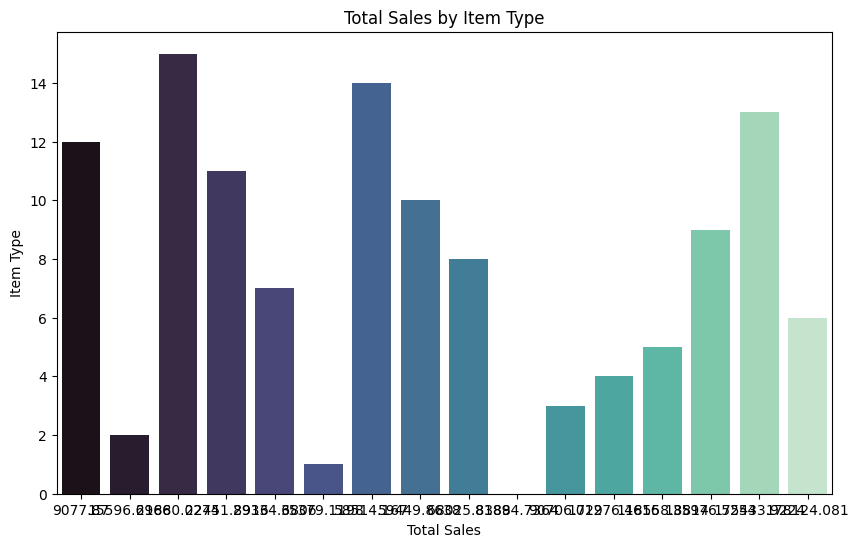

/tmp/ipython-input-3019910936.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlet_sales.index, y=outlet_sales.values, palette="cubehelix")


📌 Sales by Outlet Type:
 Outlet Type
1.0    787549.8928
0.0    151939.1490
2.0    131477.7764
3.0    130714.6746
Name: Sales, dtype: float64


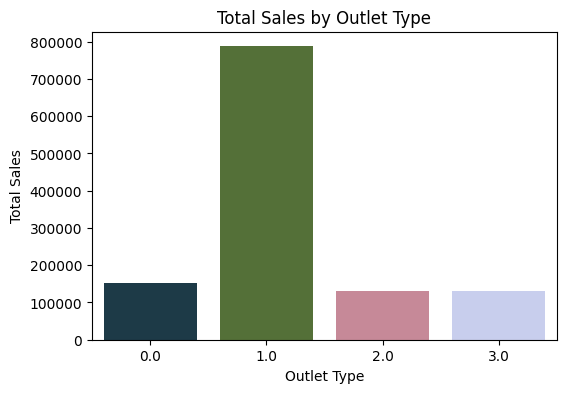

📌 Average Sales by Outlet Size:
 Outlet Size
0.0    142.037414
2.0    141.699322
1.0    139.877647
Name: Sales, dtype: float64


/tmp/ipython-input-3019910936.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_sales.index, y=size_sales.values, palette="coolwarm")


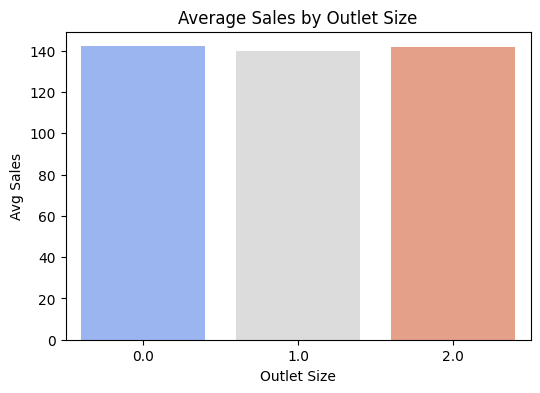

📌 Avg Sales by Fat Content:
 Item Fat Content
2.0    141.714477
1.0    140.968923
0.0    138.788317
4.0    136.313513
3.0    134.569043
Name: Sales, dtype: float64


/tmp/ipython-input-3019910936.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fat_sales.index, y=fat_sales.values, palette="Set2")


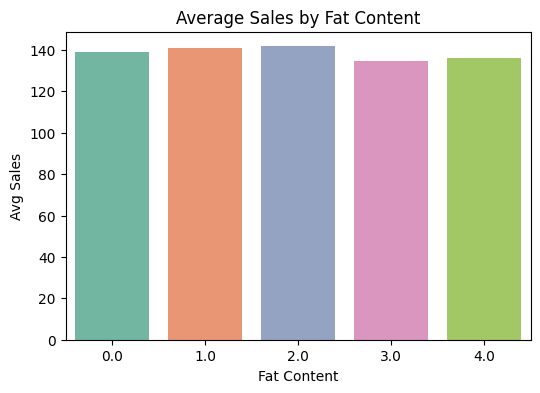

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Which year recorded the highest total sales?
year_sales = data.groupby("Outlet Establishment Year")["Sales"].sum().sort_values(ascending=False)
print("📌 Sales by Year:\n", year_sales)
plt.figure(figsize=(8,5))
sns.barplot(x=year_sales.index, y=year_sales.values, palette="viridis")
plt.title("Total Sales by Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.xlabel("Year")
plt.show()


# 2. Which product type contributes the most to overall sales?
type_sales = data.groupby("Item Type")["Sales"].sum().sort_values(ascending=False)
print("📌 Sales by Item Type:\n", type_sales)
plt.figure(figsize=(10,6))
sns.barplot(y=type_sales.index, x=type_sales.values, palette="mako")
plt.title("Total Sales by Item Type")
plt.xlabel("Total Sales")
plt.ylabel("Item Type")
plt.show()


# 3. Which outlet type generates the highest sales?
outlet_sales = data.groupby("Outlet Type")["Sales"].sum().sort_values(ascending=False)
print("📌 Sales by Outlet Type:\n", outlet_sales)
plt.figure(figsize=(6,4))
sns.barplot(x=outlet_sales.index, y=outlet_sales.values, palette="cubehelix")
plt.title("Total Sales by Outlet Type")
plt.ylabel("Total Sales")
plt.xlabel("Outlet Type")
plt.show()


# 4. Do larger outlets have higher sales?
size_sales = data.groupby("Outlet Size")["Sales"].mean().sort_values(ascending=False)
print("📌 Average Sales by Outlet Size:\n", size_sales)
plt.figure(figsize=(6,4))
sns.barplot(x=size_sales.index, y=size_sales.values, palette="coolwarm")
plt.title("Average Sales by Outlet Size")
plt.ylabel("Avg Sales")
plt.xlabel("Outlet Size")
plt.show()


# 5. Which Item Fat Content sells more?
fat_sales = data.groupby("Item Fat Content")["Sales"].mean().sort_values(ascending=False)
print("📌 Avg Sales by Fat Content:\n", fat_sales)
plt.figure(figsize=(6,4))
sns.barplot(x=fat_sales.index, y=fat_sales.values, palette="Set2")
plt.title("Average Sales by Fat Content")
plt.ylabel("Avg Sales")
plt.xlabel("Fat Content")
plt.show()



